<a href="https://colab.research.google.com/github/d2525456d/Doantotnghiep/blob/main/toiuutime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random

In [ ]:
dt = pd.read_csv('data.csv')
dt

,STT,TÊN CÔNG ĐOẠN,THIẾT BỊ,TG,HỆ SỐ,TGLT,ĐƠN GIÁ,Độ khó,Công Nhân
0,1,Xã phà thun lưng,ủi,3,1.00,3,15,2,Trần Thị Cúc
1,2,Lấy dấu cắt gai xù túi sau + gọt góc,tc,4,1.00,4,20,1,Trần Thị Cúc
2,3,Đo cắt pat túi thân sau,tc,2,1.00,2,10,1,Trần Thị Cúc
3,4,Đo cắt dây treo gắn túi thân sau,tc,5,1.00,5,24,1,Trần Thị Cúc
4,6,Nối dây pat túi thân sau,1k,8,1.16,10,51,1,Trần Thị Cúc
...,...,...,...,...,...,...,...,...,...
80,89,Vệ sinh công nghiệp,tc,31,1.00,31,162,1,Lê Thị Thanh Hà + Nguyễn Thị Hài
81,90,Lộn quần ( trái sang phải ),TC,5,1.00,5,25,3,Lê Thị Như Quỳnh
82,91,Mí đáy thân trước,1K,13,1.16,15,80,2,Lê Thị Thanh Hà
83,92,Lấy dấu lưng thùa khuyu,TC,9,1.00,9,49,2,Trần Thị Cúc


In [ ]:
tasks_times = dt['TGLT'].dropna().tolist()

In [ ]:
# Số thế hệ và xác suất đột biến
num_generations = 1000
mutation_rate = 0.2
workers = [
    "Lê Thị Phương Thảo", "Hoàng Thị Mỹ Yến", "Trần Thị Tuyền", "Ngô Khắc Hiển",
    "Hồ Thị Diệp", "Nguyễn Thị Mỹ Nhung", "Thái Thị Nga",
    "Trần Thị Cúc", "Lê Thị Thanh Hà", "Nguyễn Thị Thúy", "Trần Thị Cẩm Rin",
    "Hoàng Thị Nở", "Lê Thị Như Quỳnh", "Trần Thị Thương", "Đinh Thị Mi",
    "Nguyễn Thị Ngọc Lan", "Bùi Thị Hồng Vân", "Trần Thị Oanh",
    "Nguyễn Thị Gấm", "Phan Thị Thu Hoài", "Nguyễn Thị Thu", "Nguyễn Thị Hài",
    "Nguyễn Thị Hồng"
]
num_workers = len(workers)

In [ ]:
# Định nghĩa độ thành thạo của từng công nhân
proficiency_levels = {
    "Lê Thị Phương Thảo": 1.48,
    "Hoàng Thị Mỹ Yến": 1.16,
    "Trần Thị Tuyền": 1.48,
    "Ngô Khắc Hiển": 1.00,
    "Hồ Thị Diệp": 1.16,
    "Nguyễn Thị Mỹ Nhung": 1.16,
    "Thái Thị Nga": 1.16,
    "Trần Thị Cúc": 1.00,
    "Lê Thị Thanh Hà": 1.16,
    "Nguyễn Thị Thúy": 1.16,
    "Trần Thị Cẩm Rin": 1.32,
    "Hoàng Thị Nở": 1.16,
    "Lê Thị Như Quỳnh": 1.16,
    "Trần Thị Thương": 1.16,
    "Đinh Thị Mi": 1.16,
    "Nguyễn Thị Ngọc Lan": 1.16,
    "Bùi Thị Hồng Vân": 1.00,
    "Trần Thị Oanh": 1.16,
    "Nguyễn Thị Gấm": 1.32,
    "Phan Thị Thu Hoài": 1.16,
    "Nguyễn Thị Thu": 1.16,
    "Nguyễn Thị Hài": 1.16,
    "Nguyễn Thị Hồng": 1.48
}

In [ ]:
# Khởi tạo quần thể
population_size = 1000

In [ ]:
machines = [
    0, 0, 0, 0,
    1, 2, 1, 1, 0, 2, 7, 1, 7, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 3, 2, 4, 1,
    5, 1, 1, 1, 1, 2, 7, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 2, 7, 1, 1, 3, 7,
    6, 2, 0,
    0, 0, 2, 1,
    2, 4, 2, 4, 1, 1, 0, 1, 1, 1, 4, 0, 1, 1, 2, 0, 3, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0
]

In [ ]:
# Thêm cột "Loại Máy" từ danh sách machines
dt['Loại Máy'] = machines

# Thay thế cột "TÊN CÔNG ĐOẠN" bằng chuỗi kết hợp "TÊN CÔNG ĐOẠN" và "Loại Máy"
dt['TÊN CÔNG ĐOẠN'] = dt['TÊN CÔNG ĐOẠN'] + ' - ' + dt['Loại Máy'].astype(str)

# Hiển thị DataFrame kết quả
dt


,STT,TÊN CÔNG ĐOẠN,THIẾT BỊ,TG,HỆ SỐ,TGLT,ĐƠN GIÁ,Độ khó,Công Nhân,Loại Máy
0,1,Xã phà thun lưng - 0,ủi,3,1.00,3,15,2,Trần Thị Cúc,0
1,2,Lấy dấu cắt gai xù túi sau + gọt góc - 0,tc,4,1.00,4,20,1,Trần Thị Cúc,0
2,3,Đo cắt pat túi thân sau - 0,tc,2,1.00,2,10,1,Trần Thị Cúc,0
3,4,Đo cắt dây treo gắn túi thân sau - 0,tc,5,1.00,5,24,1,Trần Thị Cúc,0
4,6,Nối dây pat túi thân sau - 1,1k,8,1.16,10,51,1,Trần Thị Cúc,1
...,...,...,...,...,...,...,...,...,...,...
80,89,Vệ sinh công nghiệp - 0,tc,31,1.00,31,162,1,Lê Thị Thanh Hà + Nguyễn Thị Hài,0
81,90,Lộn quần ( trái sang phải ) - 0,TC,5,1.00,5,25,3,Lê Thị Như Quỳnh,0
82,91,Mí đáy thân trước - 1,1K,13,1.16,15,80,2,Lê Thị Thanh Hà,1
83,92,Lấy dấu lưng thùa khuyu - 0,TC,9,1.00,9,49,2,Trần Thị Cúc,0


In [ ]:

# # Adjust fitness_multi to handle multiple workers properly with correct workload distribution
# def fitness_multi(individual):
#     workload = {worker: 0 for worker in workers}
#     for task_idx, worker_list in enumerate(individual):
#         task_time = dt['TGLT'].iloc[task_idx]
#         # Chia đều thời gian công đoạn cho các công nhân thực hiện công đoạn đó,
#         # và điều chỉnh thời gian dựa trên độ thành thạo
#         adjusted_time = task_time / max(proficiency_levels[worker] for worker in worker_list)
#         for worker in worker_list:
#             # Tính thời gian điều chỉnh cho mỗi công nhân và thêm vào workload của họ
#             workload[worker] += adjusted_time / len(worker_list)

#     # Tính độ lệch chuẩn của tổng khối lượng công việc của tất cả công nhân (càng nhỏ càng tốt)
#     workload_values = np.array(list(workload.values()))
#     return np.std(workload_values)
def adjust_task_time_with_proficiency(individual):
    worker_times = {worker: 0 for worker in workers}

    for task_idx, worker_list in enumerate(individual):
        task_time = dt['TGLT'][task_idx]
        n_workers = len(worker_list)

        # Thời gian lý thuyết chia đều cho mỗi công nhân
        theoretical_time_per_worker = task_time / n_workers

        # Tính thời gian thực tế cho mỗi công nhân dựa trên độ thông thạo
        for worker in worker_list:
            worker_proficiency = proficiency_levels[worker]
            # Điều chỉnh thời gian thực tế dựa trên độ thông thạo của công nhân
            worker_time = theoretical_time_per_worker * (1 / worker_proficiency)
            worker_times[worker] += worker_time  # Lưu thời gian cho từng công nhân

    return worker_times


def display_stage_times(individual):
    detailed_task_allocation = {worker: [] for worker in workers}

    for task_idx, worker_list in enumerate(individual):
        task_time = dt['TGLT'][task_idx]
        n_workers = len(worker_list)

        # Tính thời gian chia đều lý thuyết cho mỗi công nhân
        theoretical_time_per_worker = task_time / n_workers

        # Điều chỉnh thời gian cho từng công nhân theo độ thông thạo của họ
        for worker in worker_list:
            proficiency = proficiency_levels[worker]
            worker_time = theoretical_time_per_worker / proficiency  # Điều chỉnh thời gian theo độ thông thạo
            detailed_task_allocation[worker].append(f"Công đoạn {dt['TÊN CÔNG ĐOẠN'].iloc[task_idx]}: {worker_time:.2f} giây")
    task_allocation_with_time = detailed_task_allocation
    worker_time = []

    for worker, tasks in task_allocation_with_time.items():
        # Tính tổng thời gian cho mỗi công nhân
        total_time = sum(float(task.split(": ")[1].split()[0]) for task in tasks)
        # Chi tiết các công đoạn
        task_details = " + ".join(tasks)

        worker_time.append({
            'Công Nhân': worker,
            'Tổng Thời Gian': total_time
        })
    worker_time_df =  pd.DataFrame(worker_time)

    stage_times = []

    for task_idx, worker_list in enumerate(individual):
        task_time = dt['TGLT'][task_idx]
        n_workers = len(worker_list)

        # Tính thời gian lý thuyết chia đều cho mỗi công nhân
        theoretical_time_per_worker = task_time / n_workers

        # Tính thời gian điều chỉnh cho mỗi công nhân dựa trên độ thông thạo
        worker_times = []
        for worker in worker_list:
            proficiency = proficiency_levels[worker]
            worker_time = theoretical_time_per_worker / proficiency  # Điều chỉnh thời gian theo độ thông thạo
            worker_times.append(worker_time)

        # Nếu có 1 công nhân, giữ nguyên thời gian
        if n_workers == 1:
            total_time_for_task = worker_times[0]
        # Nếu có 2 công nhân, lấy người nhanh nhất và nhân đôi thời gian
        elif n_workers == 2:
            total_time_for_task = min(worker_times) * 2
        # Nếu có 3 công nhân, lấy người nhanh nhất và nhân ba thời gian
        elif n_workers == 3:
            total_time_for_task = min(worker_times) * 3

        # Lưu trữ thời gian cho từng công đoạn
        stage_times.append(total_time_for_task)
    #tổng thời gian từng công đoạn lớn
    #lấy dấu
    total_1  =sum(stage for stage in stage_times[0:4])
    #Thân sau
    total_2  =sum(stage for stage in stage_times[4:27])
    #Thân trước
    total_3  =sum(stage for stage in stage_times[27:50])
    #Lưng
    total_4  =sum(stage for stage in stage_times[50:53])
    #quần lót
    total_5  =sum(stage for stage in stage_times[53:57])
    #hoàn thành
    total_6  =sum(stage for stage in stage_times[57:85])
    # tổng số sản phẩm trong 1 ngày
    re_stage_time = total_1+max(max(total_2,total_3)+total_4,total_5)+total_6
    total_product = (28800-re_stage_time)/worker_time_df['Tổng Thời Gian'].max()+1
    total_product

    return total_product

# Tính lại độ lệch chuẩn dựa trên thời gian điều chỉnh (nếu cần)

# def fitness_multi(individual):
#     worker_times = adjust_task_time_with_proficiency(individual)
#     return np.std(list(worker_times.values()))

# Khởi tạo quần thể ban đầu với nhiều công nhân cho mỗi công đoạn
def generate_population_multi():
    population = []

    for _ in range(population_size):
        individual = []
        worker_machine_assignment = {worker: set() for worker in workers}  # Theo dõi loại máy mà mỗi công nhân đã làm

        for task_idx in range(len(dt)):
            machine_type = machines[task_idx]  # Máy móc của công đoạn này
            available_workers = []

            # Chỉ chọn những công nhân có thể làm việc với loại máy này mà không vi phạm ràng buộc
            for worker in workers:
                machine_types_assigned = worker_machine_assignment[worker]
                if machine_type == 0:
                    # Nếu là máy loại 0, cho phép công nhân làm tối đa 3 loại máy
                    if len(machine_types_assigned) < 3 or machine_type in machine_types_assigned:
                        available_workers.append(worker)
                else:
                    # Nếu không phải máy loại 0, chỉ cho phép làm tối đa 2 loại máy
                    if len(machine_types_assigned) < 2 or machine_type in machine_types_assigned:
                        available_workers.append(worker)

            # Đảm bảo số lượng công nhân có thể chọn nằm trong giới hạn của available_workers
            n_selected_workers = min(len(available_workers), random.randint(1, 3))
            if n_selected_workers > 0:
                selected_workers = random.sample(available_workers, n_selected_workers)

                # Cập nhật loại máy mà các công nhân được gán làm
                for worker in selected_workers:
                    worker_machine_assignment[worker].add(machine_type)

                individual.append(selected_workers)
            else:
                # Nếu không có công nhân nào khả dụng, có thể thêm xử lý ngoại lệ
                individual.append([])  # Hoặc có thể xử lý khác nếu cần

        population.append(individual)

    return population


def selection_multi(population):
    product_scores = [(individual, fitness_multi_with_machine_limit(individual)) for individual in population]
    # Loại bỏ các cá thể có fitness là None (không hợp lệ)
    valid_population = [(ind, score) for ind, score in product_scores if score is not None]

    # Sắp xếp theo sản lượng (càng lớn càng tốt)
    valid_population.sort(key=lambda x: x[1], reverse=True)

    # Trả về một nửa quần thể tốt nhất
    return [individual for individual, score in valid_population[:population_size // 2]]


# Giao phối (Crossover) với danh sách nhiều công nhân trên mỗi công đoạn
def crossover_multi(parent1, parent2):
    point = random.randint(1, len(dt) - 2)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# Đột biến (Mutation): thay đổi ngẫu nhiên danh sách công nhân cho một công đoạn
def mutate_multi(individual):
    if random.random() < mutation_rate:
        task_idx = random.randint(0, len(dt) - 1)
        # Chọn ngẫu nhiên từ 1 đến 3 công nhân cho công đoạn này
        individual[task_idx] = random.sample(workers, random.randint(1, 3))
    return individual
# Vòng lặp chính của giải thuật di truyền với nhiều công nhân trên mỗi công đoạn
# Điều chỉnh lại hàm trả về chỉ 2 giá trị để tránh lỗi "too many values to unpack"


In [ ]:
def fitness_multi_with_machine_limit(individual):
    worker_times = adjust_task_time_with_proficiency(individual)

    # Kiểm tra ràng buộc về công nhân cho mỗi công đoạn (ít nhất một công nhân)
    for task_idx, worker_list in enumerate(individual):
        if len(worker_list) == 0:  # Công đoạn không có công nhân
            return None  # Đánh dấu là không hợp lệ

    # Kiểm tra số loại máy mà mỗi công nhân làm việc
    worker_machine_types = {worker: set() for worker in workers}

    for task_idx, worker_list in enumerate(individual):
        machine_type = machines[task_idx]
        for worker in worker_list:
            worker_machine_types[worker].add(machine_type)

    # Ràng buộc số loại máy tối đa cho mỗi công nhân
    penalty = 0
    for worker, machine_types in worker_machine_types.items():
        if 0 in machine_types:
            if len(machine_types) > 3:  # Nếu có máy loại 0, tối đa là 3 loại máy
                penalty += 1  # Đánh dấu vi phạm
        else:
            if len(machine_types) > 2:  # Nếu không có máy loại 0, tối đa là 2 loại máy
                penalty += 1  # Đánh dấu vi phạm

    if penalty > 0:
        return None  # Cá thể vi phạm, không hợp lệ
    else:
        return display_stage_times(individual)  # Tính toán số sản phẩm


In [ ]:
best_population = []
population = generate_population_multi()
max_best_product = 0  # Khởi tạo giá trị sản lượng tối đa ban đầu
elite_population = []  # Danh sách elite_population của thế hệ trước

for generation in range(num_generations):
    # Lựa chọn các cá thể tốt nhất (không bị vi phạm)
    selected_population = selection_multi(population)

    # Giữ lại các cá thể tốt nhất từ thế hệ trước (elitism)
    elite_population = sorted(population, key=lambda ind: fitness_multi_with_machine_limit(ind) or -1, reverse=True)[:2]  # Giữ lại 2 cá thể tốt nhất

    # Giao phối và tạo thế hệ mới
    new_population = []
    while len(new_population) < population_size:
        parent1, parent2 = random.sample(selected_population, 2)
        child1, child2 = crossover_multi(parent1, parent2)
        mutated_child1 = mutate_multi(child1)
        mutated_child2 = mutate_multi(child2)

        # Kiểm tra xem cá thể có bị phạt hay không
        fitness_child1 = fitness_multi_with_machine_limit(mutated_child1)
        fitness_child2 = fitness_multi_with_machine_limit(mutated_child2)

        # Nếu cá thể bị phạt, sử dụng elite_population
        if fitness_child1 is None:  # Nếu bị phạt
            mutated_child1 = random.choice(elite_population)

        if fitness_child2 is None:  # Nếu bị phạt
            mutated_child2 = random.choice(elite_population)

        # Thêm cá thể vào thế hệ mới
        new_population.append(mutated_child1)
        new_population.append(mutated_child2)

    population = new_population

    # Lấy ra giải pháp tốt nhất trong thế hệ này
    best_individual = max(population, key=lambda ind: fitness_multi_with_machine_limit(ind) or -1)
    best_product = fitness_multi_with_machine_limit(best_individual)

    # Cập nhật nếu tìm được sản lượng tốt hơn
    if best_product and max_best_product < best_product:
        max_best_product = best_product
        best_population = population

    print(f"Thế hệ {generation + 1}: Sản lượng tốt nhất = {max_best_product:.4f}")
    print(f"Thế hệ {generation + 1}: Sản lượng  = {best_product:.4f}")

# Lấy cá thể tốt nhất từ quần thể tốt nhất
best_individual = max(best_population, key=lambda ind: fitness_multi_with_machine_limit(ind) or -1)


<ipython-input-53-773a0eb23ea0>:24: RuntimeWarning: divide by zero encountered in scalar divide
  theoretical_time_per_worker = task_time / n_workers


Thế hệ 1: Sản lượng tốt nhất = 182.5830
Thế hệ 1: Sản lượng  = 182.5830
Thế hệ 2: Sản lượng tốt nhất = 185.4405
Thế hệ 2: Sản lượng  = 185.4405
Thế hệ 3: Sản lượng tốt nhất = 188.6806
Thế hệ 3: Sản lượng  = 188.6806
Thế hệ 4: Sản lượng tốt nhất = 188.6806
Thế hệ 4: Sản lượng  = 188.6806
Thế hệ 5: Sản lượng tốt nhất = 196.8434
Thế hệ 5: Sản lượng  = 196.8434
Thế hệ 6: Sản lượng tốt nhất = 201.3297
Thế hệ 6: Sản lượng  = 201.3297
Thế hệ 7: Sản lượng tốt nhất = 202.1640
Thế hệ 7: Sản lượng  = 202.1640
Thế hệ 8: Sản lượng tốt nhất = 204.7352
Thế hệ 8: Sản lượng  = 204.7352
Thế hệ 9: Sản lượng tốt nhất = 212.4444
Thế hệ 9: Sản lượng  = 212.4444
Thế hệ 10: Sản lượng tốt nhất = 214.5798
Thế hệ 10: Sản lượng  = 214.5798
Thế hệ 11: Sản lượng tốt nhất = 219.2599
Thế hệ 11: Sản lượng  = 219.2599
Thế hệ 12: Sản lượng tốt nhất = 219.2599
Thế hệ 12: Sản lượng  = 219.2599
Thế hệ 13: Sản lượng tốt nhất = 225.1579
Thế hệ 13: Sản lượng  = 225.1579
Thế hệ 14: Sản lượng tốt nhất = 225.6992
Thế hệ 14: Sản 

In [ ]:
def display_worker_tasks(individual):
    # Tạo một dictionary lưu trữ các công đoạn mà mỗi công nhân đảm nhiệm
    worker_tasks = {worker: [] for worker in workers}

    # Lặp qua từng công đoạn trong cá thể tốt nhất
    for task_idx, worker_list in enumerate(individual):
        # Lấy tên công đoạn và loại máy cho công đoạn hiện tại
        task_name = dt['TÊN CÔNG ĐOẠN'].iloc[task_idx]  # Sử dụng iloc để tránh lỗi index
        machine_type = machines[task_idx]

        # Thêm công đoạn và loại máy vào danh sách công việc của từng công nhân
        for worker in worker_list:
            worker_tasks[worker].append(f"{task_name} (Máy {machine_type})")

    # Hiển thị kết quả
    for worker, tasks in worker_tasks.items():
        if tasks:  # Nếu công nhân có công việc
            tasks_str = ", ".join(tasks)
            print(f"Công nhân {worker} làm các công đoạn: {tasks_str}")
        else:
            print(f"Công nhân {worker} không có công việc.")

# Gọi hàm hiển thị công việc của từng công nhân cho cá thể tốt nhất
best_individual = max(best_population, key=fitness_multi_with_machine_limit)


display_worker_tasks(best_individual)


Công nhân Lê Thị Phương Thảo làm các công đoạn: Bỏ rập đh cơi túi ( xù, pat, lược tp cơi) - 7 (Máy 7), Ép keo paget - 5 (Máy 5), Bỏ rập đh túi hông x2 + lấy dấu + canh sọc - 7 (Máy 7), Lựa số+ bỏ rập đh tt + lấy dấu + paget - 7 (Máy 7), Xỏ dây luồn lưng + so dây - 0 (Máy 0), Vệ sinh công nghiệp - 0 (Máy 0)
Công nhân Hoàng Thị Mỹ Yến làm các công đoạn: Đo cắt dây treo gắn túi thân sau - 0 (Máy 0), Ép dây pat túi thân sau - 2 (Máy 2), Lượ số vs5c decuop vào túi thân sau - 2 (Máy 2), Lựa số + vss5c đecup thân sau - 2 (Máy 2), Nối thun lưng + cắt - 2 (Máy 2), diễu kan sai đáy trong - 4 (Máy 4), Chạy kansai lưng - 4 (Máy 4), Lộn quần ( trái sang phải ) - 0 (Máy 0)
Công nhân Trần Thị Tuyền làm các công đoạn: Đo cắt pat túi thân sau - 0 (Máy 0), Cuốn miệng túi đồng hồ - 1 (Máy 1), Lấy dấu thun lưng + kéo - 0 (Máy 0), Lộn quần ( trái sang phải ) - 1 (Máy 1), Gắn nhãn tp - 1 (Máy 1), May lai quần tp x2 - 1 (Máy 1), Thắt nơ dây luồn quần - 0 (Máy 0), Cắt chỉ + gọt lươc gà túi sau - 0 (Máy 0), Vệ

In [ ]:
# Lấy cá thể tốt nhất từ quần thể tốt nhất
best_individual = max(best_population, key=fitness_multi_with_machine_limit)

# Gán lời giải tốt nhất (nhiều công nhân trên mỗi công đoạn) vào bảng kết quả
dt['Công Nhân Mới (Nhiều)'] = [", ".join(worker_list) for worker_list in best_individual]

# Hiển thị kết quả cuối cùng
dt[['TÊN CÔNG ĐOẠN', 'Công Nhân Mới (Nhiều)']]

,TÊN CÔNG ĐOẠN,Công Nhân Mới (Nhiều)
0,Xã phà thun lưng - 0,"Trần Thị Cẩm Rin, Phan Thị Thu Hoài"
1,Lấy dấu cắt gai xù túi sau + gọt góc - 0,"Nguyễn Thị Gấm, Hoàng Thị Nở"
2,Đo cắt pat túi thân sau - 0,"Trần Thị Tuyền, Phan Thị Thu Hoài, Nguyễn Thị Thu"
3,Đo cắt dây treo gắn túi thân sau - 0,"Nguyễn Thị Hồng, Nguyễn Thị Thu, Hoàng Thị Mỹ Yến"
4,Nối dây pat túi thân sau - 1,"Nguyễn Thị Thu, Trần Thị Cẩm Rin, Lê Thị Thanh Hà"
...,...,...
80,Vệ sinh công nghiệp - 0,"Lê Thị Phương Thảo, Trần Thị Tuyền, Trần Thị Oanh"
81,Lộn quần ( trái sang phải ) - 0,"Hoàng Thị Nở, Hoàng Thị Mỹ Yến, Nguyễn Thị Gấm"
82,Mí đáy thân trước - 1,Trần Thị Oanh
83,Lấy dấu lưng thùa khuyu - 0,"Nguyễn Thị Hồng, Phan Thị Thu Hoài, Nguyễn Thị..."


In [ ]:
def display_task_allocation_with_time(individual):
    detailed_task_allocation = {worker: [] for worker in workers}

    for task_idx, worker_list in enumerate(individual):
        task_time = dt['TGLT'][task_idx]
        n_workers = len(worker_list)

        # Tính thời gian chia đều lý thuyết cho mỗi công nhân
        theoretical_time_per_worker = task_time / n_workers

        # Điều chỉnh thời gian cho từng công nhân theo độ thông thạo của họ
        for worker in worker_list:
            proficiency = proficiency_levels[worker]
            worker_time = theoretical_time_per_worker / proficiency  # Điều chỉnh thời gian theo độ thông thạo
            detailed_task_allocation[worker].append(f"Công đoạn {dt['TÊN CÔNG ĐOẠN'].iloc[task_idx]}: {worker_time:.2f} giây")

    return detailed_task_allocation


# Chọn cá thể tốt nhất (cá thể có độ lệch chuẩn nhỏ nhất)
task_allocation_with_time = display_task_allocation_with_time(best_individual)

# Hiển thị chi tiết công việc cho mỗi công nhân
worker_task_summary = []
worker_time = []

for worker, tasks in task_allocation_with_time.items():
    # Tính tổng thời gian cho mỗi công nhân
    total_time = sum(float(task.split(": ")[1].split()[0]) for task in tasks)
    # Chi tiết các công đoạn
    task_details = " + ".join(tasks)
    worker_task_summary.append({
        'Công Nhân': worker,
        'Chi Tiết Công Việc': task_details,
        'Tổng Thời Gian': total_time
    })
    worker_time.append({
        'Công Nhân': worker,
        'Tổng Thời Gian': total_time
    })

# Chuyển thành DataFrame để hiển thị
worker_task_summary_df = pd.DataFrame(worker_task_summary)

# Hiển thị kết quả chi tiết cho mỗi công nhân
worker_task_summary_df
def display_task_allocation_with_time(individual):
    detailed_task_allocation = {worker: [] for worker in workers}

    for task_idx, worker_list in enumerate(individual):
        task_time = dt['TGLT'][task_idx]
        n_workers = len(worker_list)

        # Tính thời gian chia đều lý thuyết cho mỗi công nhân
        theoretical_time_per_worker = task_time / n_workers

        # Điều chỉnh thời gian cho từng công nhân theo độ thông thạo của họ
        for worker in worker_list:
            proficiency = proficiency_levels[worker]
            worker_time = theoretical_time_per_worker / proficiency  # Điều chỉnh thời gian theo độ thông thạo
            detailed_task_allocation[worker].append(f"Công đoạn {dt['TÊN CÔNG ĐOẠN'].iloc[task_idx]}: {worker_time:.2f} giây")

    return detailed_task_allocation


# Chọn cá thể tốt nhất (cá thể có độ lệch chuẩn nhỏ nhất)
task_allocation_with_time = display_task_allocation_with_time(best_individual)

# Hiển thị chi tiết công việc cho mỗi công nhân
worker_task_summary = []
worker_time = []

for worker, tasks in task_allocation_with_time.items():
    # Tính tổng thời gian cho mỗi công nhân
    total_time = sum(float(task.split(": ")[1].split()[0]) for task in tasks)
    # Chi tiết các công đoạn
    task_details = " + ".join(tasks)
    worker_task_summary.append({
        'Công Nhân': worker,
        'Chi Tiết Công Việc': task_details,
        'Tổng Thời Gian': total_time
    })
    worker_time.append({
        'Công Nhân': worker,
        'Tổng Thời Gian': total_time
    })

# Chuyển thành DataFrame để hiển thị
worker_task_summary_df = pd.DataFrame(worker_task_summary)

# Hiển thị kết quả chi tiết cho mỗi công nhân
worker_task_summary_df


,Công Nhân,Chi Tiết Công Việc,Tổng Thời Gian
0,Lê Thị Phương Thảo,"Công đoạn Bỏ rập đh cơi túi ( xù, pat, lược tp...",89.41
1,Hoàng Thị Mỹ Yến,Công đoạn Đo cắt dây treo gắn túi thân sau - 0...,88.37
2,Trần Thị Tuyền,Công đoạn Đo cắt pat túi thân sau - 0: 0.45 gi...,89.30
3,Ngô Khắc Hiển,Công đoạn Gọt lộn dây treo túi sau + lộn - 0: ...,88.00
4,Hồ Thị Diệp,Công đoạn Lượ số vs5c decuop vào túi thân sau ...,83.32
5,Nguyễn Thị Mỹ Nhung,Công đoạn Chốt pat túi thân sau - 1: 3.02 giây...,85.77
6,Thái Thị Nga,Công đoạn Ép keo cơi túi - 2: 4.31 giây + Công...,88.79
7,Trần Thị Cúc,Công đoạn Ép dây pat túi thân sau - 2: 3.50 gi...,86.50
8,Lê Thị Thanh Hà,Công đoạn Nối dây pat túi thân sau - 1: 2.87 g...,88.50
9,Nguyễn Thị Thúy,Công đoạn Chốt pat túi thân sau - 1: 3.02 giây...,89.09


In [ ]:
worker_time_df =  pd.DataFrame(worker_time)
worker_time_df


,Công Nhân,Tổng Thời Gian
0,Lê Thị Phương Thảo,89.41
1,Hoàng Thị Mỹ Yến,88.37
2,Trần Thị Tuyền,89.30
3,Ngô Khắc Hiển,88.00
4,Hồ Thị Diệp,83.32
5,Nguyễn Thị Mỹ Nhung,85.77
6,Thái Thị Nga,88.79
7,Trần Thị Cúc,86.50
8,Lê Thị Thanh Hà,88.50
9,Nguyễn Thị Thúy,89.09


In [ ]:
def display_stage_times(individual):
    stage_times = []

    for task_idx, worker_list in enumerate(individual):
        task_time = dt['TGLT'][task_idx]
        n_workers = len(worker_list)

        # Tính thời gian lý thuyết chia đều cho mỗi công nhân
        theoretical_time_per_worker = task_time / n_workers

        # Tính thời gian điều chỉnh cho mỗi công nhân dựa trên độ thông thạo
        worker_times = []
        for worker in worker_list:
            proficiency = proficiency_levels[worker]
            worker_time = theoretical_time_per_worker / proficiency  # Điều chỉnh thời gian theo độ thông thạo
            worker_times.append(worker_time)

        # Nếu có 1 công nhân, giữ nguyên thời gian
        if n_workers == 1:
            total_time_for_task = worker_times[0]
        # Nếu có 2 công nhân, lấy người nhanh nhất và nhân đôi thời gian
        elif n_workers == 2:
            total_time_for_task = min(worker_times) * 2
        # Nếu có 3 công nhân, lấy người nhanh nhất và nhân ba thời gian
        elif n_workers == 3:
            total_time_for_task = min(worker_times) * 3

        # Lưu trữ thời gian cho từng công đoạn
        stage_times.append({
            'Công Đoạn': dt['TÊN CÔNG ĐOẠN'].iloc[task_idx],
            'Tổng Thời Gian': total_time_for_task
        })

    return stage_times

# Sử dụng hàm display_stage_times để hiển thị thời gian của từng công đoạn
stage_times_summary = display_stage_times(best_individual)

# Chuyển thành DataFrame để hiển thị
stage_times_df = pd.DataFrame(stage_times_summary)

# Hiển thị kết quả
stage_times_df


,Công Đoạn,Tổng Thời Gian
0,Xã phà thun lưng - 0,2.272727
1,Lấy dấu cắt gai xù túi sau + gọt góc - 0,3.030303
2,Đo cắt pat túi thân sau - 0,1.351351
3,Đo cắt dây treo gắn túi thân sau - 0,3.378378
4,Nối dây pat túi thân sau - 1,7.575758
...,...,...
80,Vệ sinh công nghiệp - 0,20.945946
81,Lộn quần ( trái sang phải ) - 0,3.787879
82,Mí đáy thân trước - 1,12.931034
83,Lấy dấu lưng thùa khuyu - 0,6.081081


In [ ]:
#tổng thời gian từng công đoạn lớn
#lấy dấu
total_1  =sum(stage['Tổng Thời Gian'] for stage in stage_times_summary[0:4])
#Thân sau
total_2  =sum(stage['Tổng Thời Gian'] for stage in stage_times_summary[4:27])
#Thân trước
total_3  =sum(stage['Tổng Thời Gian'] for stage in stage_times_summary[27:50])
#Lưng
total_4  =sum(stage['Tổng Thời Gian'] for stage in stage_times_summary[50:53])
#quần lót
total_5  =sum(stage['Tổng Thời Gian'] for stage in stage_times_summary[53:57])
#hoàn thành
total_6  =sum(stage['Tổng Thời Gian'] for stage in stage_times_summary[57:85])


In [ ]:
# tổng số sản phẩm trong 1 ngày
re_stage_time = total_1+max(max(total_2,total_3)+total_4,total_5)+total_6
print(re_stage_time)
total_product = (28800-re_stage_time)/worker_time_df['Tổng Thời Gian'].max()+1
total_product

1345.0326470671298


308.0681954248168

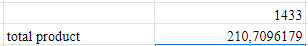

In [ ]:
# Hàm tính lương và tổng tiền lương cho tất cả công nhân
def calculate_salary(individual, proficiency_levels, dt):
    worker_salaries = {worker: 0 for worker in workers}  # Khởi tạo lương cho mỗi công nhân bằng 0

    for task_idx, worker_list in enumerate(individual):
        # Lấy đơn giá của công đoạn hiện tại
        task_price = dt['ĐƠN GIÁ'][task_idx]
        num_workers = len(worker_list)  # Số công nhân thực hiện công đoạn

        # Chia đơn giá cho số công nhân nếu nhiều người thực hiện
        price_per_worker = task_price / num_workers

        # Tính lương cho từng công nhân tham gia công đoạn
        for worker in worker_list:
            proficiency = proficiency_levels[worker]  # Lấy năng lực của công nhân
            # Lương cho công đoạn này bằng đơn giá chia cho số công nhân, sau đó nhân năng lực
            salary_for_task = price_per_worker * proficiency
            # Cộng lương cho công đoạn này vào tổng lương của công nhân
            worker_salaries[worker] += salary_for_task

    # Tạo DataFrame chứa kết quả lương của từng công nhân
    salary_df = pd.DataFrame.from_dict(worker_salaries, orient='index', columns=['Tiền Lương'])
    salary_df.reset_index(inplace=True)
    salary_df.columns = ['Công Nhân', 'Tổng Tiền Lương']

    # Tính tổng tiền lương của tất cả công nhân
    total_salary = salary_df['Tổng Tiền Lương'].sum()
    print(f"Tổng tiền lương của tất cả công nhân: {total_salary:.2f}")

    return salary_df, total_salary

# Sử dụng hàm để tính lương cho mỗi công nhân và tổng lương
salary_df, total_salary = calculate_salary(best_individual, proficiency_levels, dt)

# Hiển thị DataFrame chứa tổng tiền lương cho mỗi công nhân
print(salary_df)
print(f"Tổng tiền lương của tất cả công nhân: {total_salary:.2f}")


Tổng tiền lương của tất cả công nhân: 15459.75
              Công Nhân  Tổng Tiền Lương
0    Lê Thị Phương Thảo      1037.726667
1      Hoàng Thị Mỹ Yến       627.753333
2        Trần Thị Tuyền      1039.206667
3         Ngô Khắc Hiển       467.666667
4           Hồ Thị Diệp       593.340000
5   Nguyễn Thị Mỹ Nhung       613.640000
6          Thái Thị Nga       633.360000
7          Trần Thị Cúc       457.833333
8       Lê Thị Thanh Hà       627.560000
9       Nguyễn Thị Thúy       636.646667
10     Trần Thị Cẩm Rin       817.520000
11         Hoàng Thị Nở       627.366667
12     Lê Thị Như Quỳnh       629.300000
13      Trần Thị Thương       620.986667
14          Đinh Thị Mi       624.660000
15  Nguyễn Thị Ngọc Lan       603.006667
16     Bùi Thị Hồng Vân       464.500000
17        Trần Thị Oanh       612.286667
18       Nguyễn Thị Gấm       814.660000
19    Phan Thị Thu Hoài       634.906667
20       Nguyễn Thị Thu       629.880000
21       Nguyễn Thị Hài       613.640000
22      Ng

In [ ]:
# Hàm tính tổng tiền lương cho cá thể (phân công công nhân)
def calculate_total_salary(individual, proficiency_levels, dt):
    worker_salaries = {worker: 0 for worker in workers}

    for task_idx, worker_list in enumerate(individual):
        task_price = dt['ĐƠN GIÁ'][task_idx]
        num_workers = len(worker_list)
        price_per_worker = task_price / num_workers

        # Tính lương cho từng công nhân dựa trên năng lực
        for worker in worker_list:
            proficiency = proficiency_levels[worker]
            salary_for_task = price_per_worker * proficiency
            worker_salaries[worker] += salary_for_task

    # Tổng tiền lương cho tất cả công nhân trong cá thể này
    total_salary = sum(worker_salaries.values())
    return total_salary

# Khởi tạo quần thể ban đầu